In [2]:
import os
import cv2 as cv
import pandas as pd
import numpy as np
import torch 
import torch.nn as nn
import albumentations as A
from torch.utils.data import Dataset, DataLoader, random_split
import  matplotlib.pyplot as plt


In [3]:
# Read the Dataset -----------------------------

path = 'D:\Datasets\Computer Vision\Avengers'
avengers = os.listdir(path)

# Chris_evans - 0
# Chris_hemsworth - 1
# mark_ruffalo - 2
# robert_downey_jr - 3
# scarlett_johansson - 4

avengers

['chris_evans',
 'chris_hemsworth',
 'mark_ruffalo',
 'robert_downey_jr',
 'scarlett_johansson']

In [58]:
# Setting up the hyperparameters ---------------------

img_height = 256
img_width = 256

transform = A.Compose([
    A.Resize(width=img_width, height=img_height),
    A.Rotate(limit=45, p=0.2),
    A.HorizontalFlip(p=0.4),
    A.VerticalFlip(p=0.1)
])

epochs = 20
lr = 0.0001
batch_size = 16
loss = nn.CrossEntropyLoss()

In [59]:
# Create a dataframe which store the image path and corresponding avenger name -----------------------

df = pd.DataFrame(columns=['avenger', 'image'])

for i, avenger in enumerate(avengers):
    imgs_path = os.path.join(path, avenger)
    all_imgs = os.listdir(imgs_path)
    
    for image in all_imgs:
        df2 = {'avenger':i, 'image':os.path.join(imgs_path, image)}
        df = df.append(df2, ignore_index=True)


In [60]:
# Shape of the DataFrame -----------------------------------

df.shape

(274, 2)

In [61]:
# Creating a Dataset for the avengers --------------------

class Aveng_dataset(Dataset):
    def __init__(self):
        super().__init__()
        self.x = np.array(df['image'])
        self.y = np.array(df['avenger'])
        
    def __getitem__(self, item):
        image_path = self.x[item]
        label = self.y[item]
   
        img = cv.imread(image_path)
        augment = transform(image=img)

        img = augment['image']
        img = torch.Tensor(img)
        img = img.permute(2,  0, 1)
        label = torch.from_numpy(np.array(label))
        return img, label
        
    def __len__(self):
        return self.x.shape[0]

In [ ]:
# a = Aveng_dataset()
# a.__getitem__(245)

In [62]:
# Splitting the Data into training and Testing Size -------------------------

data = Aveng_dataset()

train_len = int( 0.8 * len(data))
test_len = len(data) - train_len

train_data, test_data = random_split(data, [train_len, test_len])

train_batch = DataLoader(
            train_data, batch_size=batch_size
)

test_batch = DataLoader(
            test_data, batch_size=batch_size
)

In [10]:

for b in train_batch:
    (imgs, label) = b
    print(imgs.shape, label.shape)
    break

torch.Size([16, 3, 256, 256]) torch.Size([16])


In [63]:
# Declaring the Model ----------------------

import torchvision.models as models

resnet = models.resnet18()
resnet.fc = nn.Sequential(
    nn.Linear(512, 5)
)
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [64]:
# Training  the Model ------------------------------

opti = torch.optim.Adam(resnet.parameters(), lr=lr)
for epoch in range(epochs):
    
    for (imgs, labels) in train_batch:
        y_hat = resnet(imgs)
        l = loss(y_hat, labels.long())
        
        print(f"for epoch -> {epoch} loss is {l}")
        l.backward()
        opti.step()
        opti.zero_grad()
        

for epoch -> 0 loss is 1.7252299785614014
for epoch -> 0 loss is 1.6495150327682495
for epoch -> 0 loss is 1.7437759637832642
for epoch -> 0 loss is 1.8276923894882202
for epoch -> 0 loss is 1.6786870956420898
for epoch -> 0 loss is 1.444926142692566
for epoch -> 0 loss is 1.5971771478652954
for epoch -> 0 loss is 1.6399321556091309
for epoch -> 0 loss is 1.7245444059371948
for epoch -> 0 loss is 1.3655667304992676
for epoch -> 0 loss is 1.4520175457000732
for epoch -> 0 loss is 1.557429313659668
for epoch -> 0 loss is 1.6864947080612183
for epoch -> 0 loss is 1.4182591438293457
for epoch -> 1 loss is 1.529678463935852
for epoch -> 1 loss is 1.3925957679748535
for epoch -> 1 loss is 1.5270425081253052
for epoch -> 1 loss is 1.4380590915679932
for epoch -> 1 loss is 1.4101234674453735
for epoch -> 1 loss is 1.3535773754119873
for epoch -> 1 loss is 1.1387150287628174
for epoch -> 1 loss is 1.1392732858657837
for epoch -> 1 loss is 1.437098741531372
for epoch -> 1 loss is 1.2385057210922

for epoch -> 13 loss is 0.34494802355766296
for epoch -> 13 loss is 0.08408228307962418
for epoch -> 13 loss is 0.06721115112304688
for epoch -> 14 loss is 0.11348502337932587
for epoch -> 14 loss is 0.8517435193061829
for epoch -> 14 loss is 0.2729809582233429
for epoch -> 14 loss is 0.19644436240196228
for epoch -> 14 loss is 0.08355989307165146
for epoch -> 14 loss is 0.3048853278160095
for epoch -> 14 loss is 0.2144559770822525
for epoch -> 14 loss is 0.08847889304161072
for epoch -> 14 loss is 0.11782974749803543
for epoch -> 14 loss is 0.07946459949016571
for epoch -> 14 loss is 0.3452497124671936
for epoch -> 14 loss is 0.5892773866653442
for epoch -> 14 loss is 0.06251659989356995
for epoch -> 14 loss is 0.11066445708274841
for epoch -> 15 loss is 0.30773207545280457
for epoch -> 15 loss is 0.3098370134830475
for epoch -> 15 loss is 0.8175773024559021
for epoch -> 15 loss is 0.3909759223461151
for epoch -> 15 loss is 0.2920052111148834
for epoch -> 15 loss is 0.3421783447265625

In [65]:
# Testing the accuracy  -------------------------

with torch.no_grad():
    correct = 0
    tot = 0
    for (imgs, labels) in test_batch:
        out = resnet(imgs)
        
        y_hat = torch.argmax(out, axis=1)
        
        correct += (sum(labels == y_hat))
        tot += labels.shape[0]
        
print(f"accuracy is {correct/tot}")

accuracy is 0.6000000238418579


In [66]:
# -------------------Check on a random image ----------------

images_path = 'D:\\Datasets\\intern\\all'
samples_images = os.listdir(images_path)
temp = []

for img in samples_images:
    complete_path = os.path.join(images_path, img)
    
    temp.append(complete_path)



In [33]:
# Creating a function to see the predictions of model on some data --------------------

results = {0:'Chris_evans', 1: 'Chris_hemsworth', 2:'robert_downey_jr', 3:'mark_ruffalo', 4:'scarlett_johansson'}

def run_model(img_path):
    image = cv.imread(img_path)
    
    temp = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    print("The image is -> ")
    plt.imshow(temp)
    
    img = cv.resize(temp, (img_height, img_width))
    
    img = torch.Tensor(img)
    img = img.unsqueeze(0)
    img = img.permute(0, 3, 1, 2)
    output = resnet(img)
    print(output)
    out = torch.argmax(output)
    print(out.item())
    
    print(f'class which the model predicted is -. {results[out.item()]}')

The image is -> 
tensor([[ 0.0031,  0.2058,  0.3100,  0.2237, -0.2821]],
       grad_fn=<AddmmBackward>)
2
class which the model predicted is -. robert_downey_jr


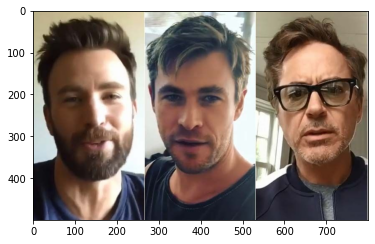

In [67]:
run_model(temp[0])

The image is -> 
tensor([[ 0.0207,  0.2684,  0.3108,  0.2064, -0.2730]],
       grad_fn=<AddmmBackward>)
2
class which the model predicted is -. robert_downey_jr


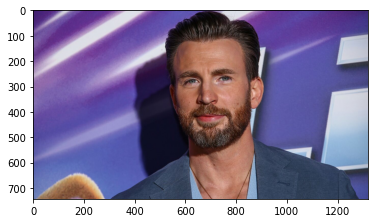

In [68]:
run_model(temp[1])

The image is -> 
tensor([[ 0.0748,  0.3099,  0.2898,  0.1673, -0.3254]],
       grad_fn=<AddmmBackward>)
1
class which the model predicted is -. Chris_hemsworth


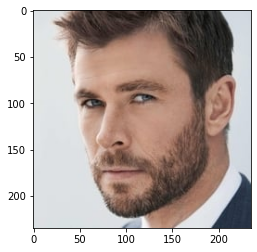

In [69]:
run_model(temp[8])

The image is -> 
tensor([[-0.0287,  0.3216,  0.2586,  0.2051, -0.2887]],
       grad_fn=<AddmmBackward>)
1
class which the model predicted is -. Chris_hemsworth


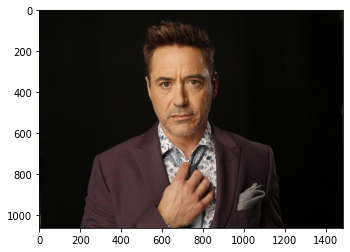

In [70]:
run_model(temp[5])

The image is -> 
tensor([[ 0.0164,  0.1744,  0.3258,  0.2011, -0.2671]],
       grad_fn=<AddmmBackward>)
2
class which the model predicted is -. robert_downey_jr


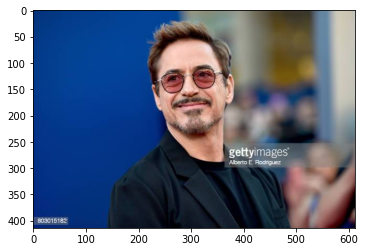

In [73]:
run_model(temp[3])

The image is -> 
tensor([[-0.0262,  0.2577,  0.3719,  0.2072, -0.2570]],
       grad_fn=<AddmmBackward>)
2
class which the model predicted is -. robert_downey_jr


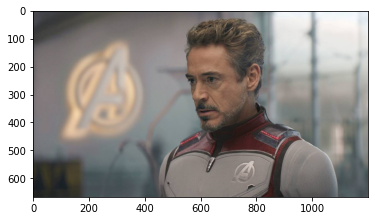

In [74]:
run_model(temp[6])

The image is -> 
tensor([[ 0.0175,  0.3460,  0.3014,  0.1806, -0.2844]],
       grad_fn=<AddmmBackward>)
1
class which the model predicted is -. Chris_hemsworth


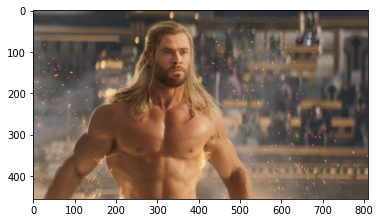

In [76]:
run_model(temp[9])

The image is -> 
tensor([[-0.0563,  0.2498,  0.2800,  0.2065, -0.2451]],
       grad_fn=<AddmmBackward>)
2
class which the model predicted is -. robert_downey_jr


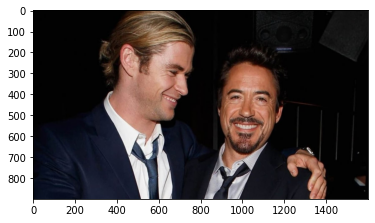

In [77]:
run_model(temp[10])

The image is -> 
tensor([[ 0.0348,  0.2308,  0.2720,  0.2364, -0.2532]],
       grad_fn=<AddmmBackward>)
2
class which the model predicted is -. robert_downey_jr


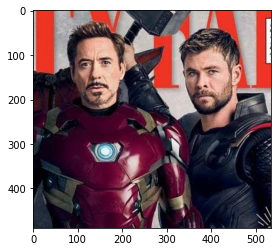

In [78]:
run_model(temp[11])